In [1]:
from tinyphysics import TinyPhysicsModel, TinyPhysicsSimulator, CONTROL_START_IDX
from controllers import my_pid, pid
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

sns.set_theme()

/Users/freeklinssen/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.25.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
def plot_rollout(sim):
  fig, ax = plt.subplots(figsize=(10, 5))
  ax.plot(sim.target_lataccel_history, label="Target Lateral Acceleration", alpha=0.5)
  ax.plot(sim.current_lataccel_history, label="Actual Lateral Acceleration", alpha=0.5)
  ax.plot([x.roll_lataccel for x in sim.state_history], label="Roll Lateral Accelration", alpha=0.5)
  ax.plot([x.a_ego for x in sim.state_history], label="foreward accelration", alpha=0.5)
  ax.plot(sim.action_history, label="Steer History", alpha=0.5)
  ax.legend()
  ax.set_xlabel("Step")
  ax.set_ylabel("Lateral Acceleration")
  ax.set_title("Rollout")
  plt.show()
  
  fig, ax = plt.subplots(figsize=(10, 5))
  ax.plot([x.v_ego for x in sim.state_history], label="speed", alpha=0.5)
  ax.legend()
  ax.set_xlabel("Step")
  ax.set_ylabel("Speed")
  ax.set_title("Rollout")
  plt.show()
  
  fig, ax = plt.subplots(figsize=(10, 5))
  ax.plot([sim.current_lataccel_history[i]- sim.target_lataccel_history[i] for i in range(len(sim.target_lataccel_history))], label="difference", alpha=0.5)
  ax.plot([x.roll_lataccel for x in sim.state_history], label="foreward accelration", alpha=0.5)
 
  ax.legend()
  ax.set_xlabel("Step")
  ax.set_ylabel("Speed")
  ax.set_title("Rollout")
  plt.show()

In [3]:
model = TinyPhysicsModel("./models/tinyphysics.onnx", debug=True)

0.8579436552948418
33.43670476690802
76.3338875316501


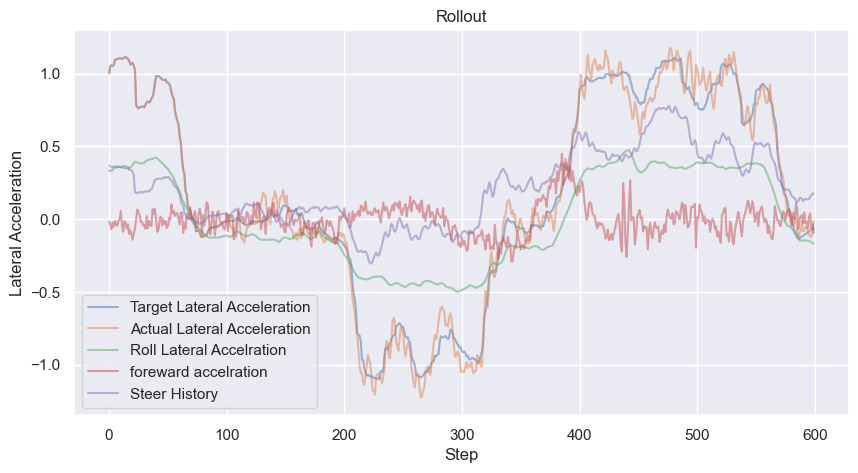

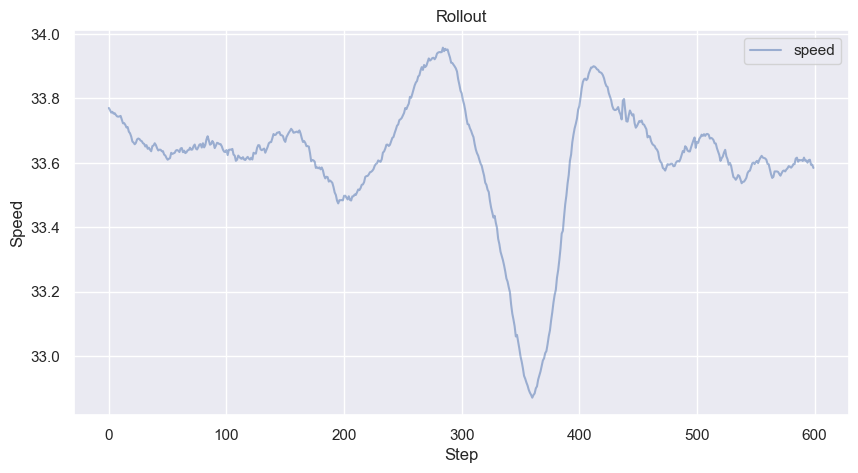

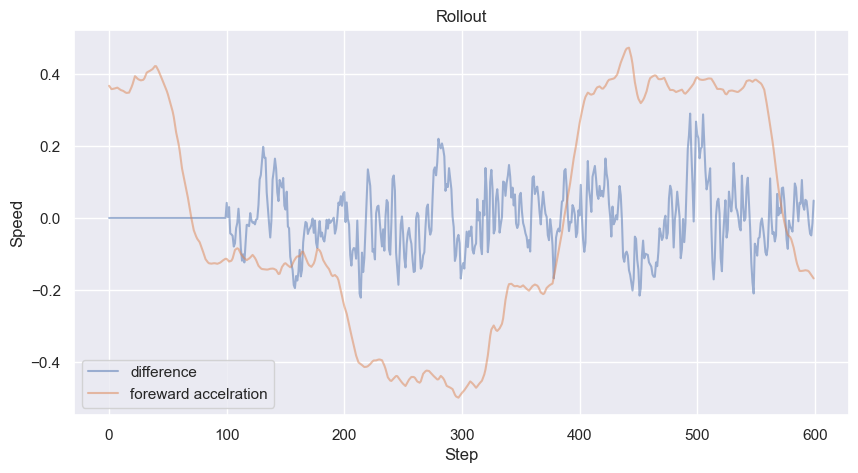

In [4]:
controller = my_pid.Controller()
sim = TinyPhysicsSimulator(model, "./data/00000.csv", controller=controller, debug=False)
sim.rollout()

#{'lataccel_cost': lat_accel_cost, 'jerk_cost': jerk_cost, 'total_cost': total_cost}
losses  = sim.compute_cost()
print(losses['lataccel_cost'])
print(losses['jerk_cost'])
print(losses['total_cost'])

plot_rollout(sim)

In [5]:
count = 200
lataccel_cost = 0
jerk_cost = 0
total_cost = 0 

for i in range(count):
    print(i)
    controller = my_pid.Controller()
    num = str(i).zfill(5)
    sim = TinyPhysicsSimulator(model, "./data/%s.csv"%num, controller=controller, debug=False)
    sim.rollout()

    
    losses  = sim.compute_cost()
    lataccel_cost += losses['lataccel_cost']
    jerk_cost += losses['jerk_cost']
    total_cost += losses['total_cost']


lataccel_cost = lataccel_cost/count
jerk_cost = jerk_cost/count
total_cost = total_cost/count

print(lataccel_cost)
print(jerk_cost)
print(total_cost)
    

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
0.5666542537211582
19.582097540912354
47.914810226970275


In [6]:
# my pid
200 iterations
0.5972242990446552
21.89289510759867
51.75411005983148

best:
0.5666542537211582
19.582097540912354
47.914810226970275


50 iterations
0.541389798422198
18.914335389896625
45.98382531100654

# without pit factor
0.5497026192568107
19.34069289047406
46.8258238533146

# without p adjustment
0.5350453062690073
19.446118375164566
46.198383688614925

[4, 3, 2, 2, 2, 1]
0.546671928311547
17.55587190864438
44.889468324221724

p=0.28
0.5478126447789459
18.084172801896056
45.47480504084336

i= 0.08
0.521854699482287
18.751304512249295
44.84403948636363

d = -0.09
0.5144724831124252
19.000676663398405
44.72430081901965

weight = 0.82 but we just use 0.8
0.5215242328776383
17.666623509321248
43.74283515320316
    
best: 
0.5215242328776383
17.666623509321248
43.74283515320316

SyntaxError: invalid syntax (3813926761.py, line 2)